In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [131]:
b17 = pd.read_csv('coinmarketcap_06122017.csv')

Q1

In [160]:
b17['id'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
1026    False
1027    False
1028    False
1029    False
1030    False
Name: id, Length: 1031, dtype: bool

In [133]:
b17['market_cap_usd'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
1321     True
1322     True
1323     True
1324     True
1325     True
Name: market_cap_usd, Length: 1326, dtype: bool

In [134]:
b17['market_cap_usd'].count()

1031

In [135]:
b17.dropna(subset = ['market_cap_usd'],inplace = True)

Q2

In [136]:
b17.sort_values(by = 'market_cap_usd', ascending = False, inplace = True)

In [137]:
b17['percent share'] = (b17['market_cap_usd']/b17['market_cap_usd'].sum())*100

In [138]:
b17.head()

,Unnamed: 0,24h_volume_usd,available_supply,id,last_updated,market_cap_usd,max_supply,name,percent_change_1h,percent_change_24h,percent_change_7d,price_btc,price_usd,rank,symbol,total_supply,percent share
0,0,9.007640e+09,1.672352e+07,bitcoin,1512549554,2.130493e+11,2.100000e+07,Bitcoin,0.12,7.33,17.45,1.000000,12739.500000,1,BTC,1.672352e+07,56.918669
1,1,1.551330e+09,9.616537e+07,ethereum,1512549553,4.352945e+10,NaN,Ethereum,-0.18,-3.93,-7.33,0.036177,452.652000,2,ETH,9.616537e+07,11.629410
2,2,1.111350e+09,1.684044e+07,bitcoin-cash,1512549578,2.529585e+10,2.100000e+07,Bitcoin Cash,1.65,-5.51,-4.75,0.120050,1502.090000,3,BCH,1.684044e+07,6.758088
3,3,2.936090e+09,2.779530e+09,iota,1512549571,1.475225e+10,2.779530e+09,IOTA,-2.38,83.35,255.82,0.000424,5.307460,4,MIOTA,2.779530e+09,3.941238
4,4,2.315050e+08,3.873915e+10,ripple,1512549541,9.365343e+09,1.000000e+11,Ripple,0.56,-3.70,-14.79,0.000019,0.241754,5,XRP,9.999309e+10,2.502063


Q3

<AxesSubplot:xlabel='id', ylabel='percent share'>

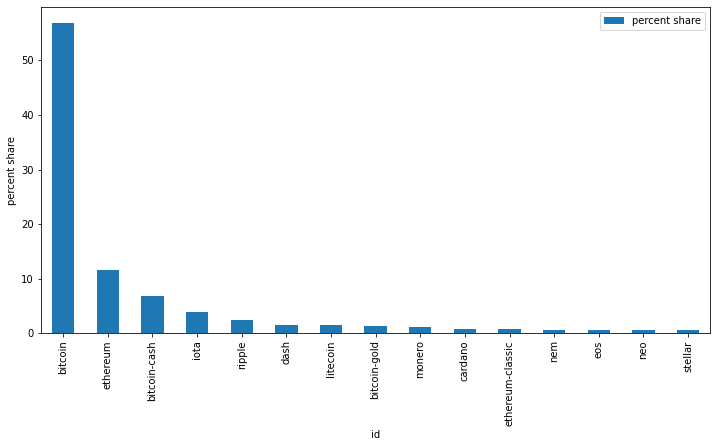

In [139]:
b17.head(15).plot(kind = 'bar', x ='id' , y ='percent share', ylabel = 'percent share', figsize= (12,6))

Q4

<AxesSubplot:xlabel='id', ylabel='USD'>

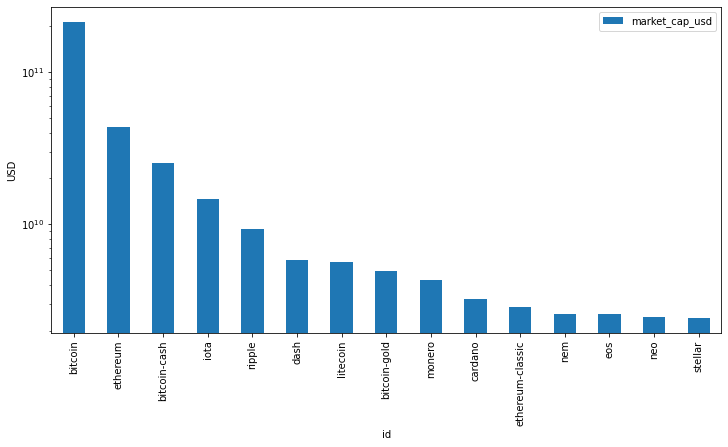

In [140]:
b17.head(15).plot(kind = 'bar', x ='id' , y ='market_cap_usd', logy = True, ylabel = 'USD', figsize = (12,6))

Q5

In [141]:
pch = b17.sort_values(by = 'percent_change_24h', ascending = False)
pcw = b17.sort_values(by = 'percent_change_7d', ascending = False)

In [144]:
volatilityh = b17[['id','percent_change_24h','percent_change_7d']]

In [145]:
volatilityh.sort_values(by = 'percent_change_24h', ascending = False, inplace = True)

c:\users\omen\appdata\local\programs\python\python37\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [146]:
volatilityh.head(10)

,id,percent_change_24h,percent_change_7d
134,fedoracoin,833.01,92.10
832,cashcoin,457.86,374.30
149,bitzeny,416.04,3360.71
697,beatcoin,295.49,132.79
630,eaglecoin,272.50,114.73
303,asiacoin,267.20,521.47
635,comet,252.07,560.46
735,coimatic-2,244.26,132.24
890,coexistcoin,230.87,142.78
531,britcoin,223.31,272.18


In [147]:
volatilityd = volatility.sort_values(by = 'percent_change_7d', ascending = False)

In [148]:
volatilityd.dropna(inplace = True)

In [149]:
top_10_losers_24h = volatilityh.nsmallest(10,'percent_change_24h')

In [150]:
top_10_losers_7d = volatilityd.nsmallest(10,'percent_change_7d')

In [151]:
volatilityd.head(10)

,id,percent_change_24h,percent_change_7d
149,bitzeny,416.04,3360.71
390,bitcoin-red,-29.87,693.37
635,comet,252.07,560.46
88,yoyow,119.59,547.12
555,erc20,-8.34,545.73
498,petrodollar,-76.55,542.96
303,asiacoin,267.20,521.47
738,litebitcoin,-39.85,474.80
403,luxcoin,-8.52,403.73
734,veros,46.83,395.53


Q6

Text(0, 0.5, 'Percentage Change')

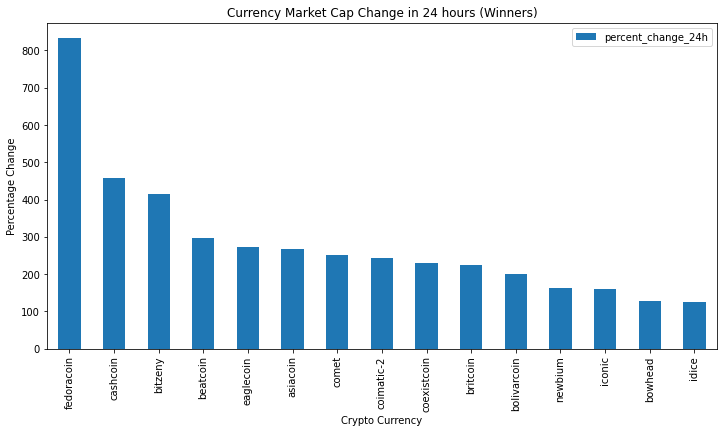

In [143]:
pch.head(15).plot(kind = 'bar', x ='id' , y ='percent_change_24h', figsize=(12,6))
plt.title("Currency Market Cap Change in 24 hours (Winners)")
plt.xlabel("Crypto Currency")
plt.ylabel("Percentage Change")

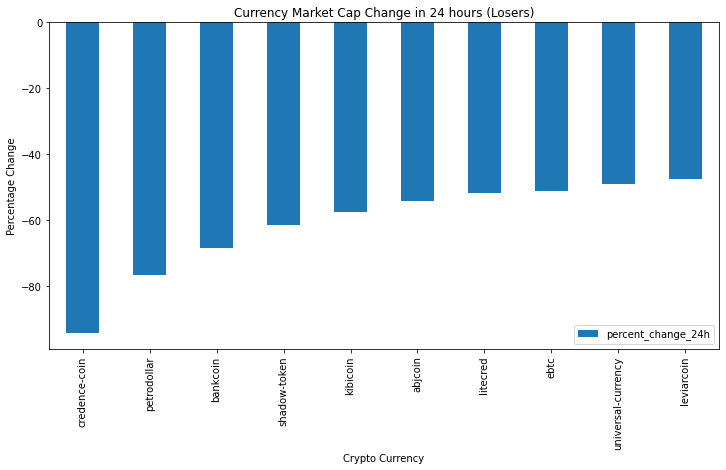

In [152]:


top_10_losers_24h.plot(kind = 'bar', x ='id' , y ='percent_change_24h', figsize = (12,6))
plt.title("Currency Market Cap Change in 24 hours (Losers)")
plt.xlabel("Crypto Currency")
plt.ylabel("Percentage Change")
plt.show()

Q7

Text(0, 0.5, 'Percentage Change')

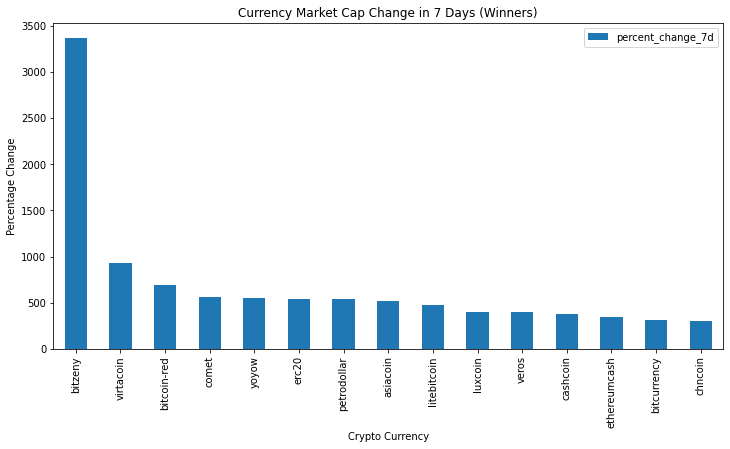

In [142]:
pcw.head(15).plot(kind = 'bar', x ='id' , y ='percent_change_7d',figsize = (12,6))
plt.title("Currency Market Cap Change in 7 Days (Winners)")
plt.xlabel("Crypto Currency")
plt.ylabel("Percentage Change")

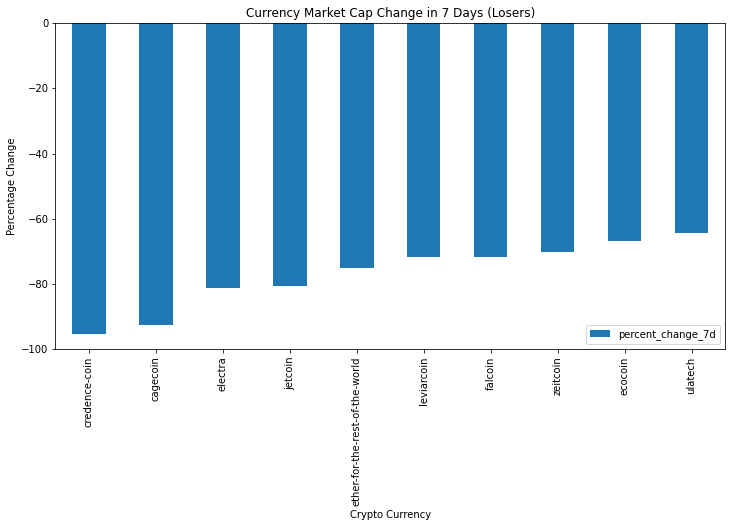

In [153]:
top_10_losers_7d.plot(kind = 'bar', x ='id' , y ='percent_change_7d', figsize = (12,6))
plt.title("Currency Market Cap Change in 7 Days (Losers)")
plt.xlabel("Crypto Currency")
plt.ylabel("Percentage Change")
plt.show()

Q8

In [154]:
smallest = b17.nsmallest(10,'market_cap_usd')
largest = b17.nlargest(10,'market_cap_usd')

In [157]:
display(smallest[['id', 'market_cap_usd']])

,id,market_cap_usd
1030,applecoin-apw,10.0
1029,falcoin,23.0
1028,caliphcoin,100.0
1027,environ,136.0
1026,future-digital-currency,251.0
1025,mantracoin,514.0
1024,digital-money-bits,515.0
758,abncoin,856.0
1023,digital-credits,2187.0
1022,swaptoken,2288.0


In [158]:
display(largest[['id', 'market_cap_usd']])

,id,market_cap_usd
0,bitcoin,2.130493e+11
1,ethereum,4.352945e+10
2,bitcoin-cash,2.529585e+10
3,iota,1.475225e+10
4,ripple,9.365343e+09
5,dash,5.794076e+09
6,litecoin,5.634498e+09
7,bitcoin-gold,4.920065e+09
8,monero,4.331688e+09
9,cardano,3.231420e+09
